Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.2 от 11.11.2024

Хабибуллин Ринат 2024 г.

---

In [1]:
"""
Импортируем библиотеки, которые могут пригодиться для проведения расчетов
"""

import numpy as np
import matplotlib.pyplot as plt
import anaflow 
import scipy.special
import sympy as sp
import mpmath as mp

# Уравнение фильтрации в пространстве Лапласа 

Рассматривается уравнение фильтрации в безразмерных переменных 

\begin{equation} 
\frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D}\left[ \frac{ \partial{}}{ \partial{r_D} }\left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) \right] 
\end{equation}

где введены следующие безразмерные переменные:

- $r_D$ - безразмерное расстояние от центра скважины

- $t_D$ - безразмерное время

- $p_D$ - безразмерное давление
 

Соответствующие определения безразмерных переменных для единиц измерения СИ.

$$ r_D = \frac{r}{r_w}$$
$$ t_D = \frac{kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{2 \pi kh}{ q_{ref} B \mu} \left( p_i - p \right)$$
$$ q_D = \frac{q}{q_{ref}} $$

где в свою очередь: 

- $q_D$ - безразмерный дебит
  
- $q$ - дебит скважины на поверхности, приведенный к нормальным условиям, м3/сек
  
- $q_{ref}$ - референсный дебит скважины на поверхности, приведенный к нормальным условиям, м3/сек

- $\phi$ - пористость, доли единиц

- $\mu$ - вязкость нефти в пласте, Па с

- $B$ - объемный коэффициент нефти, м3/м3

- $p_i$ - начальное давление в пласте, Па

- $p$ - давление забойное, Па

- $c_t$ - общая сжимаемость системы в пласте, 1/Па

- $k$ - проницаемость, м2

- $t$ -  время, сек

- $r$ - расстояние от центра скважины, м

- $r_w$ - радиус скважины, м

Соответствующие определения безразмерных переменных для практических метрических единиц измерения.

$$ r_D = \frac{r}{r_w}$$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{kh}{ 18.4 q_{ref} B \mu} \left( p_i - p \right)$$
$$ q_D = \frac{q}{q_{ref}} $$

где в свою очередь: 

* $q$ - дебит скважины на поверхности, приведенный к нормальным условиям, м3/сут
  
* $q_{ref}$ - референсный дебит скважины на поверхности, приведенный к нормальным условиям, м3/сут

* $\phi$ - пористость, доли единиц

* $\mu$ - вязкость нефти в пласте, сП

* $B$ - объемный коэффициент нефти, м3/м3

* $p_i$ - начальное давление в пласте, атм

* $p$ - давление забойное, атм

* $c_t$ - общая сжимаемость системы в пласте, 1/атм

* $k$ - проницаемость, мД

* $t$ -  время, час

* $r$ - расстояние от центра скважины, м

* $r_w$ - радиус скважины, м

Решение такого уравнение может быть получено с использованием [преобразования Лапласа](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0). 
$$ 
L \left [ f(t) \right] = \tilde{f}(u) = \int_{0}^{\infty}f(t)e^{-ut}dt 
$$

где $u$ параметр пространства Лапласа соответствующий времени.

Тогда уравнение в пространстве Лапласа преобразуется к виду:

\begin{equation} 
u \widetilde{p_D}  =  \dfrac{1}{r_D} \left[\dfrac{d}{d r_D} \left(r_D \dfrac{d{\widetilde{p_D}}}{d r_D} \right) \right] 
\end{equation} 

Получившееся уравнение известно как [модифицированное уравнение Бесселя](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F). Общее решение этого уравнения можно записать в виде 


\begin{equation}  
\widetilde{p_D}(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) 
\end{equation} 

где 

* $u$ - переменная пространства Лапласа, соответствующая времени

* $\widetilde{p_D}(u, r_D)$ - изображение давления в пространстве Лапласа

* $K_0, I_0$ - модифицированные функции Бесселя нулевого порядка (могут быть вычислены, например, с использованием реализации в библиотке `scipy.special`)

* $A(u), B(u)$ - произвольные функции, которые могут быть определены при задании начальных и граничных условий

Исследование частных решений приведенных уравнений и проведение практических расчетов на основе этих решений с использованием python и библиотек numpy, scipy, sympy является целью этой работы. 

## Модифицированные функции Бесселя. Манипуляции с использованием `scipy.special` и `sympy`

Для модифицированных функций Бесселя нулевого и первого порядка верно

$$\dfrac{dI_0(u)}{du} = I_1(u)$$

$$\dfrac{dK_0(u)}{du} =-K_1(u)$$

Для работы со специальными функциями, в том числе модифицированными функциями Бесселя можно и удобно использовать модули python `scipy.special` и `sympy`.

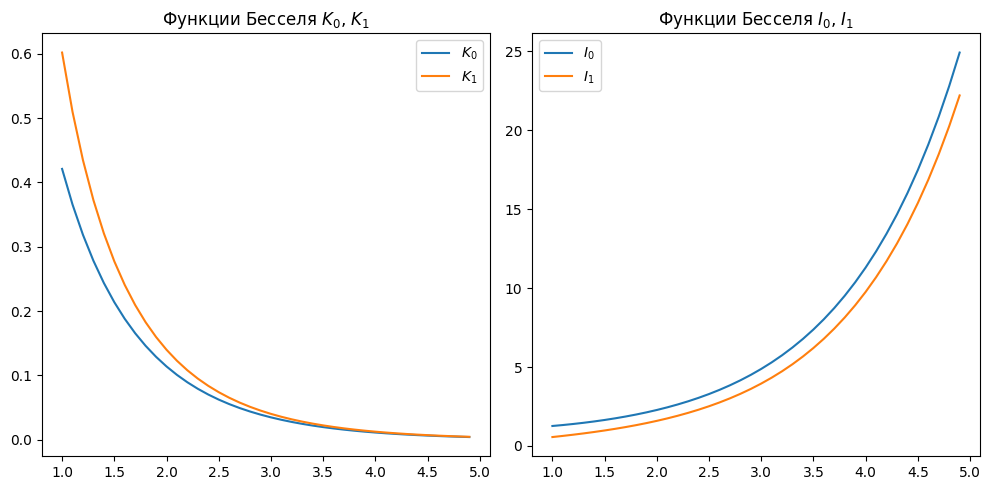

In [2]:
"""
Построим графики модифицированных функций Бесселя 
с использованием matplotlib и scipy.special.
Так как функции K и I обладают разным поведением построим 
их графики отдельно.
"""
# зададим интервал построения графиков
x = np.arange(1, 5, 0.1)
# построим графики c использованием matplotlib
# зададим общие параметры фигуры с графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
# построим графики, каждый на своих осях
ax1.plot(x, scipy.special.kn(0,x), label='$K_0$')
ax1.plot(x, scipy.special.kn(1,x), label='$K_1$')
# настроим графики
ax1.set_title("Функции Бесселя $K_0$, $K_1$")
ax1.legend()

ax2.plot(x, scipy.special.iv(0,x), label='$I_0$')
ax2.plot(x, scipy.special.iv(1,x), label='$I_1$')
ax2.set_title("Функции Бесселя $I_0$, $I_1$")
ax2.legend()

plt.tight_layout()
plt.show()

Для работы со специальными функциями можно использовать также модуль символьных вычислений `sympy`, которые позволяет выполнять простые преобразования и вычисления. 

In [3]:
"""
Приведем пример работы с функциями Бесселя с использованием sympy.
Вычисляется производная K0
"""
# зададим символьную переменную, и ее отображение в формулах
z = sp.symbols('z')
# функция бесселя в sympy
print('функция Бесселя  K0 в sympy')
display(sp.besselk(0, z))
# найдем производную модифицированной фунции Бесселя K0
print('функция Бесселя  K1 это производная от функции K0')
display(sp.diff(sp.besselk(0, z), z))


функция Бесселя  K0 в sympy


besselk(0, z)

функция Бесселя  K1 это производная от функции K0


-besselk(1, z)

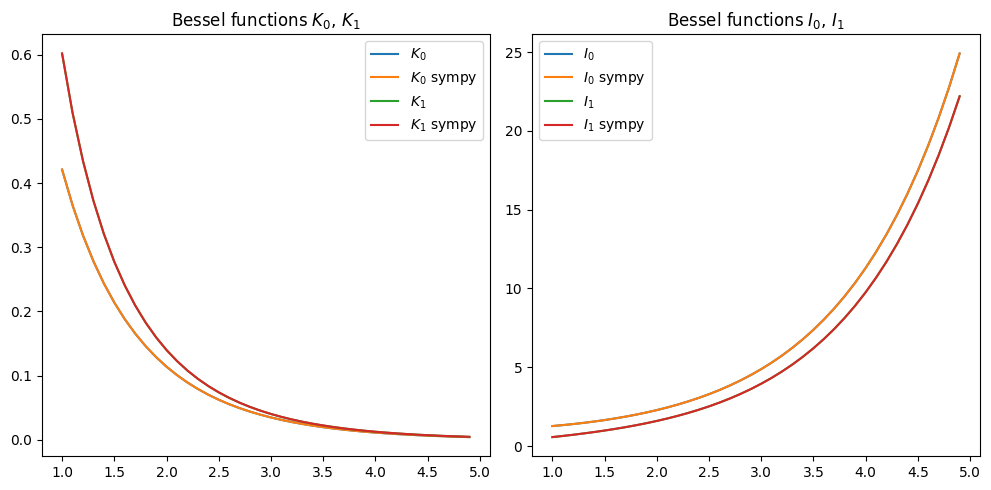

In [4]:
"""
Построим графики функций Бесселя с использованием matplotlib,
scipy.special и sympy. Для численных расчетов sympy используем 
лямбдафикацию (sp.lambdify) генерирующую численные функции по 
известным символьным. 
При генерации можно использовать mpmath или numpy, scipy.
Мы используем второй вариант, он быстрее.
"""

# преобразование sympy выражения в lambda функцию 
k0 = sp.lambdify([z], sp.besselk(0, z), modules = ['numpy', 'scipy'])
k1 = sp.lambdify([z], sp.besselk(1, z), modules = ['numpy', 'scipy'])
i0 = sp.lambdify([z], sp.besseli(0, z), modules = ['numpy', 'scipy'])
i1 = sp.lambdify([z], sp.besseli(1, z), modules = ['numpy', 'scipy'])

# построим графики модифицированных функций Бесселя
x = np.arange(1, 5, 0.1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
ax1.plot(x, scipy.special.kn(0,x), label='$K_0$')
ax1.plot(x, k0(x), label='$K_0$ sympy')
ax1.plot(x, scipy.special.kn(1,x), label='$K_1$')
ax1.plot(x, k1(x), label='$K_1$ sympy')
ax1.set_title("Bessel functions $K_0$, $K_1$")
ax1.legend()

ax2.plot(x, scipy.special.iv(0,x), label='$I_0$')
ax2.plot(x, i0(x), label='$I_0$ sympy')
ax2.plot(x, scipy.special.iv(1,x), label='$I_1$')
ax2.plot(x, i1(x), label='$I_1$ sympy')
ax2.set_title("Bessel functions $I_0$, $I_1$")
ax2.legend()

plt.tight_layout()
plt.show()

Построенные графики показывают совпадение расчетов с использованием `scipy.special` и `sympy`. Хороший вопрос - какой вариант быстрее.

## Построение общего решения с использованием `sympy` 
Рассматривается уравнение фильтрации в безразмерных переменных 


\begin{equation} 
\frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D}\left[ \frac{ \partial{}}{ \partial{r_D} }\left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) \right] 
\end{equation} 

При переводе уравнения фильтрации в пространство Лапласа получим обыкновенное дифференциальное уравнение.


$$ 
u \widetilde{p_D}  =  \dfrac{1}{r_D} \left[\dfrac{d}{d r_D} \left(r_D \dfrac{d{\widetilde{p_D}}}{d r_D} \right) \right] 
$$

Для построения решений удобно использовать возможности символьных вычислений с использованием пакета `sympy`. Как минимум это позволяет минимизировать риск арифметических ошибок при проведении математических операций. Также `sympy` может помочь сгенерировать расчетный код для сложных математических функций.


In [5]:
"""
Построим общее решение уравнения фильтрации с использованием sympy
"""
# определим переменные с которыми будем работать 
t_d = sp.symbols('t_d', real=True, positive=True)
r_d = sp.symbols('r_d', real=True, positive=True)
p_d = sp.symbols('p_d', cls=sp.Function, real=True, positive=True)
Lp_d = sp.symbols(r'\widetilde{p_d}', cls=sp.Function, 
                  real=True, positive=True)
u = sp.symbols('u',real=True, positive=True)
A, B = sp.symbols('A B')
q_d = sp.symbols('q_D', real=True, positive=True)
Lq_d = sp.symbols(r'\widetilde{q_D}', real=True, positive=True)

# определим уравнение фильтрации в пространстве Лапласа
diff_eq = sp.Eq(u * Lp_d(r_d),
                1/r_d * (sp.diff(r_d*sp.diff(Lp_d(r_d), r_d), r_d)))
# отобразим полученное уравнение
display(diff_eq)

Eq(u*\widetilde{p_d}(r_d), (r_d*Derivative(\widetilde{p_d}(r_d), (r_d, 2)) + Derivative(\widetilde{p_d}(r_d), r_d))/r_d)

In [6]:
"""
решим ОДУ средствами sympy
"""
soln = sp.dsolve(diff_eq, Lp_d(r_d))
display(soln)

Eq(\widetilde{p_d}(r_d), C1*besseli(0, r_d*sqrt(u)) + C2*bessely(0, I*r_d*sqrt(u)))

In [7]:
"""
Проверим, что решение удовлетворяет уравнению
"""
sp.checkodesol(diff_eq, soln)

(True, 0)

Как видно, уравнение Бесселя легко решается средствами `sympy`, полученное решение имеет вид

\begin{equation}
\widetilde{p_{d}}{\left(r_{d} \right)} = C_{1} I_{0}\left(r_{d} \sqrt{u}\right) + C_{2} Y_{0}\left(i r_{d} \sqrt{u}\right)
\end{equation}

Хотя полученное решение по виду и немного отличается от того, что обычно приводится в книгах. Вместо мофицированной функции Бесселя второго рода $K_0(x)$ решение выражается через функцию Бесселя второго рода $Y_0(ix)$ для мнимого арумента. 

[Известны выражения](https://en.wikipedia.org/wiki/Bessel_function#Modified_Bessel_functions:_I%CE%B1,_K%CE%B1) связывающие функции Бесселя первого $J_\alpha(iz)$ и второго рода $Y_\alpha(iz)$ для мнимых аргументов с модифицированными функциями Бесселя первого $I_\alpha(z)$  и второго рода $K_\alpha(z)$.


$$ J_\alpha(iz) = e^{\frac{\alpha\pi i}{2}} I_\alpha(z)$$
$$ Y_\alpha(iz) = e^{\frac{(\alpha+1)\pi i}{2}}I_\alpha(z) - \frac{2}{\pi}e^{-\frac{\alpha\pi i}{2}}K_\alpha(z)$$

преобразуем последнее выражение

$$ Y_0(iz) = e^{\frac{\pi i}{2}}I_0(z) - \dfrac{2}{\pi}K_0(z)$$

Учитывая эти выражения можно убедиться что выражение вида 

\begin{equation} 
\widetilde{p}_D(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u)
\end{equation}

которое можно найти в книгах также будет являться общим решением уравнения фильтрации, что можно проверить командой `sympy.checkodesol`

In [8]:
"""
зададим в явном виде решение с использованием K_0 и I_0
будем далее работать с этим решением
"""
A, B = sp.symbols('A B')
soln2 = sp.Eq(Lp_d(r_d) , 
              A * sp.besselk(0, r_d * sp.sqrt(u)) + 
              B * sp.besseli(0, r_d * sp.sqrt(u)))
soln2

Eq(\widetilde{p_d}(r_d), A*besselk(0, r_d*sqrt(u)) + B*besseli(0, r_d*sqrt(u)))

In [9]:
"""
проверим, что это решение также удовлетворяет исходному уравнению
"""
sp.checkodesol(diff_eq, soln2)

(True, 0)

# Частные решения уравнения фильтрации


Дальше покажем как можно работать с полученным общим решением для построения частных решений. Для построения частного решения необходимо задать начальные и граничные условия. 

## Решения для вертильной скважины, бесконечного пласта и постоянного дебита

Рассматривается уравнение фильтрации в безразмерных переменных 
$$ 
\frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D}\left[ \frac{ \partial{}}{ \partial{r_D} }\left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) \right] 
$$
1. Однородное начальное давление в нулевой момент времени
$$ p_D(t_D=0, r_D) = 0$$

2. Граничное условия на бесконечности соответствует невозмущенному пласту
$$\lim_{r_D \to \infty} p_D(r_D, t_D) = 0$$

3. Граничное условие на скважине соответствует единичному дебиту $q_D = 1$
$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ \partial p_D(r_D, t_D)}{\partial r_D} \right] = -1$$


Знак минус для граничного условия для дебита покаывает, что дебит добывающей скважины соответствует снижению безразмерного давления (перепада давлений в пласте) при отходе от скважины.


При переводе уравнения фильтрации в пространство Лапласа преобразуется как уравнение, так и граничные условия.
Для построения простых решений далее пригодятся некоторые свойства преобразования Лапласа

$$ \mathcal{L} \left [ a \right] = \dfrac{a}{u}$$


$$ \mathcal{L} \left [ \dfrac{df}{dt} \right] = u \widetilde{f}(s) - f(t=0)$$

Уравнение в пространстве Лапласа примет вид
$$ 
u \widetilde{p_D}  =  \dfrac{1}{r_D} \left[\dfrac{d}{d r_D} \left(r_D \dfrac{d{\widetilde{p_D}}}{d r_D} \right) \right] 
$$

1. Однородное начальное давление в нулевой момент времени при преобразовании Лапласа автоматически превратится в тождество. Дифференциальное уравнение в частных производных упростится до обыкновенного дифференциального уравнения, для решения которого необходимы только граничные условия.

2. Граничное условия на бесконечности 
$$\lim_{r_D \to \infty} \widetilde{p_D} = 0$$

3. Граничное условие на скважине
$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ d \widetilde{p_D}}{d r_D} \right] = -\dfrac{1}{u} $$ 



In [10]:
"""
проверим корректность преобразования граничного условия на скважине 
с использованием sympy
"""
# граничное условие на скважине
eq_boundary = sp.Eq(r_d * sp.diff(p_d(r_d,t_d), r_d) , -1)
display(eq_boundary)

Eq(r_d*Derivative(p_d(r_d, t_d), r_d), -1)

In [11]:
"""
применим преобразование Лапласа к обеим частям граничного условия
используя sympy преобразование Лапласа
"""
eq_boundary_Laplace = sp.Eq(
    sp.laplace_transform(eq_boundary.lhs, t_d, u, noconds=True),  
    sp.laplace_transform(eq_boundary.rhs, t_d, u, noconds=True)
                            )
display(eq_boundary_Laplace)

Eq(r_d*LaplaceTransform(Derivative(p_d(r_d, t_d), r_d), t_d, u), -1/u)

Общее решение уравнения фильтрации в пространстве Лапласа имеет вид

In [12]:
# выведем решение полученное ранее
soln2

Eq(\widetilde{p_d}(r_d), A*besselk(0, r_d*sqrt(u)) + B*besseli(0, r_d*sqrt(u)))

Для построения частного решения надо найти функции $A$ и $B$ удовлетворив граничным условиям. 

Покажем, что граничному условию на бесконечности можно удовлетворить положив $B=0$. Для этого проверим предел общего решения на бесконечности

In [13]:
"""
оценим предел общего решения при стремлении r_d к бесконечности
"""
sp.limit(soln2.rhs, r_d, sp.oo)

oo*sign(B)

Предел при призвольных  $A$ и $B$ не определен.

Положим $A=0$. Это делается командой `.subs(A, 0)` для исследуемого выражения

In [14]:
"""
оценим предел общего решения при стремлении r_d к бесконечности
при условии A=0
"""
sp.limit(soln2.rhs.subs(A, 0), r_d, sp.oo)

oo*sign(B)

Получаем, что этот предел также не определен. Положим $B=0$.

In [15]:
"""
оценим предел общего решения при стремлении r_d к бесконечности
при условии B=0 
"""
sp.limit(soln2.rhs.subs(B, 0), r_d, sp.oo)

0

Получаем, что при $B=0$  выражение $\displaystyle \lim_{r_{d} \to \infty}\left(A K_{0}\left(r_{d} \sqrt{u}\right) + B I_{0}\left(r_{d} \sqrt{u}\right)\right) = 0$ 

Откуда можно сделать вывод, что для приведенных граничных условий $B=0$.

In [16]:
"""
Общее условие с учетом B=0
"""
soln3 = soln2.subs(B, 0)
soln3

Eq(\widetilde{p_d}(r_d), A*besselk(0, r_d*sqrt(u)))

Найдем констранту $A$ из второго граничного условия определяющего дебит скважины

$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ d \widetilde{p}_D}{d r_D} \right] = -\dfrac{1}{u} $$ 

In [17]:
"""
Подставим общее решение в выражение для граничного условия 2
"""
bc2 = sp.Eq(r_d * soln3.rhs.diff(r_d), -1/u)
bc2

Eq(-A*r_d*sqrt(u)*besselk(1, r_d*sqrt(u)), -1/u)

In [18]:
"""
найдем А решив алгебраическое уравнение
"""
# определим символ для безразмерного радиуса скважины
r_wd = sp.symbols('r_wd', real=True, positive=True)
# решим алгебраическое уравнение
bc2_sol = sp.solve(bc2.subs(r_d, r_wd), A)
# выведем все решения
display(bc2_sol)

[1/(r_wd*u**(3/2)*besselk(1, r_wd*sqrt(u)))]

In [19]:
"""
solve выдает список решений, нас интересует первое и единственное
"""
display(bc2_sol[0])

1/(r_wd*u**(3/2)*besselk(1, r_wd*sqrt(u)))

In [20]:
"""
подставим полученное решение в уравнение  
получим решение для произвольного радиуса скважины
"""
soln4 = soln3.subs(A, bc2_sol[0])
soln4

Eq(\widetilde{p_d}(r_d), besselk(0, r_d*sqrt(u))/(r_wd*u**(3/2)*besselk(1, r_wd*sqrt(u))))

При $r_{wd} = 1$ получим

In [21]:
"""
получим решение при единичном безразмерном радиусе скважины
"""
soln5 = soln4.subs(r_wd, 1)
soln5

Eq(\widetilde{p_d}(r_d), besselk(0, r_d*sqrt(u))/(u**(3/2)*besselk(1, sqrt(u))))


Удовлетворив общим решение граничные условия получим, что решение для радиального притока к сважине работающей с единичным дебитом и конечным радиусом скважины для произвольного расстояния от скважины будет иметь вид
\begin{equation}
\left. \widetilde{p_D}(u, r_D)\right|_{q_D=1} = \frac{K_0 \left( r_D \sqrt u  \right)}{u r_{wD}  \sqrt u  K_1(r_{wD} \sqrt u)}
\end{equation}

где $K_0$, $K_1$ - [модифицированные функции Бесселя](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F).

Несложно показать, что решение для произвольного постоянного дебита $q_D$ будет иметь вид
\begin{equation}
\widetilde{p_D}(u, r_D, q_D) = q_D \left. \widetilde{p_D}(u, r_D)\right|_{q_D=1}
\end{equation}

## Решение для бесконечно малого радиуса скважины в бесконечном пласте
Если устремить радиус скважины к нулю решение можно упростить и получим решение линейного стока

In [22]:
"""
Найдем предел решения для конечного радиуса скважины при 
стремлении радиуса скважины к нулю
"""
soln6 = sp.Eq(soln5.lhs, sp.limit(soln4.rhs, r_wd, 0))
soln6

Eq(\widetilde{p_d}(r_d), besselk(0, r_d*sqrt(u))/u)

Решение для бесконечно малого радиуса скважины в пространстве Лапласа будет иметь вид

$$ \left.\widetilde{p_D}(u, r_D, q_D)\right|_{q_D=1} = \frac{1}{u} K_0 \left( r_D \sqrt u  \right) $$

Для простых решений можно получить решение в обычных координатах проведя обратное преобразование Лапласа. Для решения линейного стока можно показать, что обратное преобразование даст известное решение с интегральной экспонентой.

\begin{equation}
p_D(r_D,t_D) =  - \frac{1}{2}  Ei \left(- \dfrac{ r_D^2}{4t_d} \right) 
\end{equation}

\begin{equation}
p_D(r_D,t_D, q_D) = q_D \left. \widetilde{p_D}(u, r_D)\right|_{q_D=1} =   -q_D \frac{1}{2}  Ei \left(- \dfrac{ r_D^2}{4t_d} \right) 
\end{equation}
Решение в размерных переменных можно записать как

\begin{equation}
p\left(r,t, q_s\right) =  p_i-\frac{18.41 q_s B\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
\end{equation}

## Численная реализация решения линейного стока и построение графиков безразмерных величин

In [23]:
"""
Выполним обратное преобразование Лапласа с sympy.
Результат получается не очень красивым 
(остаются выражения с мнимой единицей).
Если попробовать подставить решение с конечным радиусом, то
оно не будет преобразовано
"""
eqq = sp.inverse_laplace_transform(soln6.rhs, u, t_d, simplify=True)
eqq

-Ei(r_d**2*exp_polar(I*pi)/(4*t_d))/2 + I*pi/2

Хотя решения в пространстве Лапласа относительно легко получить -- обратная процедура получения решения в исходных координатах на основе решения в пространстве Лапласа оказывается сложнее. Аналитически это не всегда удается сделать, чаще эту процедуру проводят численно. 

Для численного обратного преобразования Лапласа можно, например, использовать библиотеку [`mpmath`](https://mpmath.org/doc/current/calculus/inverselaplace.html). Там же можно найти численную реализацию функций Бесселя. Но такой вариант расчета относительно медленный. Реалицию обратного численного преобразования Лапласа с использованием алгоритма Стефеста можно найти в библиотеке [`anaflow`](https://github.com/GeoStat-Framework/AnaFlow). Реализация основа на scipy, numpy и считает относительно быстро. 

In [24]:
"""
сгененируем решение линейного стока с использованием mpmath
и вычислим для примера значение в точке
"""
# для численного расчета выражения полученного sympy 
# можно его лямбдифицировать и получить python функцию
soln6_mpmath = sp.lambdify([u, r_d], soln6.rhs, modules = ['mpmath'])
print(soln6_mpmath(u=1, r_d=1))

0.421024438240708


In [25]:
"""
проинспектируем содержимое сгенерированной функции 
командой jupyter ??
"""
??soln6_mpmath

Signature: soln6_mpmath(u, r_d)
Docstring:
Created with lambdify. Signature:

func(u, r_d)

Expression:

besselk(0, r_d*sqrt(u))/u

Source code:

def _lambdifygenerated(u, r_d):
    return besselk(0, r_d*sqrt(u))/u


Imported modules:
Source:   
def _lambdifygenerated(u, r_d):
    return besselk(0, r_d*sqrt(u))/u
File:      c:\projects\welltest_examples\jupyter\<lambdifygenerated-5>
Type:      function

In [26]:
""" сгенерируем решение с использованием scipy """
soln6_scipy = sp.lambdify([u, r_d], soln6.rhs, modules = [ 'scipy'])

In [27]:
"""
проинспектируем содержимое сгенерированной функции командой ??
"""
??soln6_scipy

Signature: soln6_scipy(u, r_d)
Docstring:
Created with lambdify. Signature:

func(u, r_d)

Expression:

besselk(0, r_d*sqrt(u))/u

Source code:

def _lambdifygenerated(u, r_d):
    return kv(0, r_d*sqrt(u))/u


Imported modules:

from numpy import sqrt
Source:   
def _lambdifygenerated(u, r_d):
    return kv(0, r_d*sqrt(u))/u
File:      c:\projects\welltest_examples\jupyter\<lambdifygenerated-6>
Type:      function

Для сравнения можно построить несколько реализаций расчета для решения линейного стока. 
1. На основе известного аналитического решения с использванием интегральной экспоненты Ei
2. На основе решения в пространстве Лапласа и численного обратного преобразования. Можно использовать библиотеки `mpmath` (медленная, но потенциально более точная реализация), на основе специальных функций `scipy.special` и обратного преобразования Лапласа по алгоритму Стефеста, например реализованного в библиотеке `anaflow`
3. Для реализации решений в пространстве Лапласа можно использовать функции сгенерированные `scipy.lambdify`


In [28]:
"""
построим python функцию реализующую аналитическое решение 
уравнения фильтрации для радиального притока к скважине 
бесконечного малого радиуса (решение линейного стока)
с единичным дебитом с использованием интегральной экспоненты
"""
def pd_line_source_ei(td, rd=1.):
    """
    Решение линейного стока уравнения фильтрации
    td - безразмерное время, число или numpy массив, больше нуля
    rd - безразмерное расстояние, по умолчанию rd=1 - соответствует
          давлению на забое, число или numpy массив
    результат массив массивов давления от времени
    """
    return -0.5 * scipy.special.expi(-0.25 * rd * rd / td)

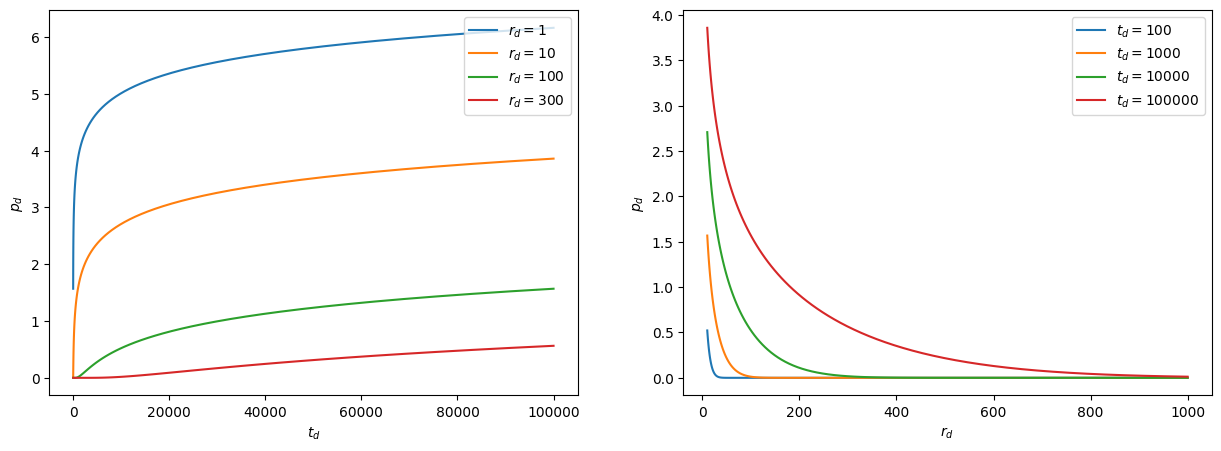

In [29]:
"""
построим графики решений от расстояния и времени для аналитического 
решения
"""
# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,100)
rd_list = [1, 10, 100, 300]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_line_source_ei(td=td_arr, 
                               rd=ri), 
             label = f'$r_d={ri:.0f}$')
for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_ei(td=ti, 
                                           rd=ri) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [30]:
"""
построим python функцию реализующую численно-аналитическое решение 
уравнения фильтрации для радиального притока к скважине 
бесконечного малого радиуса (решение для линейного стока) 
с использованием численного обратного преобразования Лапласа
"""

# пример функции реализующий расчет решения в пространстве Лапласа
def pd_lapl_line_source(u, rd=1.):
    """
    расчет решения линейного стока для безразмерного давления 
    в пространстве Лапласа
    u - переменная пространства Лапласа
    r_d- безразмерное расстояние от центра скважины
    """
    return np.divide(scipy.special.kn(0, rd * u**0.5) , u)

# функция расчета безразмерного давления на основе
# численного обратного преобразования Лапласа
def pd_line_source_inv(td, rd=1.):
    """
    расчет решения линейного стока для безразмерного давления
    на основе численного обратного преобразования Лапласа 
    (алгоритм Стефеста)
    t_d - безразмерное давление, число или numpy массив
    r_d - безразмерный радиус, по умолчанию rd=1 - соответствует
         давлению на забое, должно быть числом
    результат массив массивов давления от времени
    """
    pd_inv = anaflow.get_lap_inv(pd_lapl_line_source, rd=rd)
    return pd_inv(td)

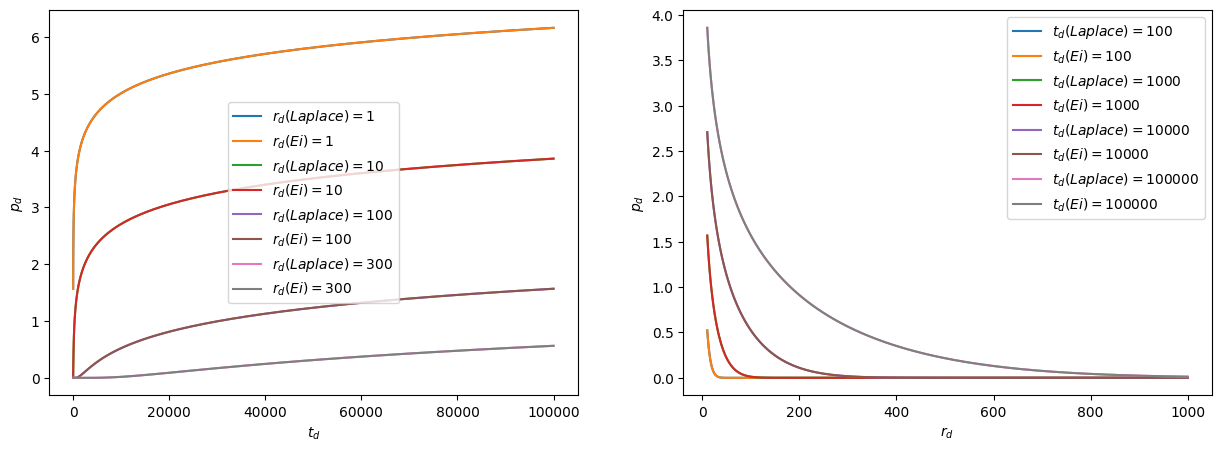

In [31]:
"""
Построим графики решений от расстояния и времени для численно-аналитического 
решения и аналитического решения.
Строим два решения, чтобы убедиться, что они совпадают.
"""
# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,100)
rd_list = [1, 10, 100, 300]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_line_source_inv(td_arr, rd=ri), 
             label = f'$r_d (Laplace)={ri:.0f}$')
    ax1.plot(td_arr, 
             pd_line_source_ei(td_arr, rd=ri), 
             label = f'$r_d (Ei)={ri:.0f}$')
for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_inv(ti, rd=ri) for ri in rd_arr]), 
             label = f'$t_d (Laplace)={ti:.0f}$')
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_ei(ti, rd=ri) for ri in rd_arr]), 
             label = f'$t_d (Ei)={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

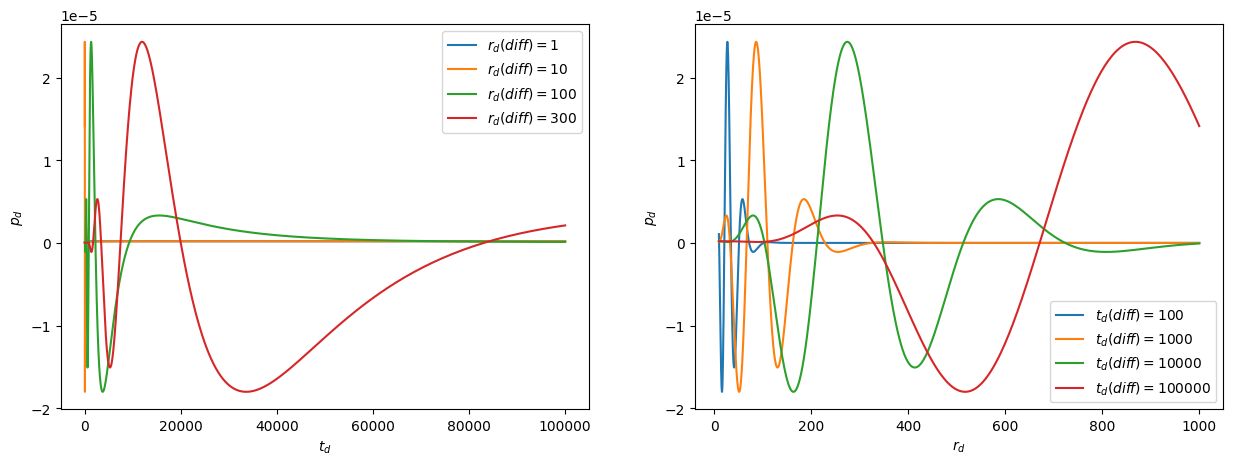

In [32]:
"""
оценка погрешности расчета с использованием аналитического решения 
и решения с численным обратным преобразованием Лапласа
"""
td_arr = np.logspace(1,5,1000)
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,1000)
rd_list = [1, 10, 100, 300]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_line_source_inv(td_arr, rd=ri) - pd_line_source_ei(td_arr, rd=ri), 
             label = f'$r_d (diff)={ri:.0f}$')

for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_inv(ti, rd=ri) for ri in rd_arr]) - 
             np.squeeze( [pd_line_source_ei(ti, rd=ri) for ri in rd_arr]), 
             label = f'$t_d (diff)={ti:.0f}$')

# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [33]:
"""
построим python функцию реализующую численно-аналитическое решение 
уравнения фильтрации для радиального притока к скважине 
бесконечного малого радиуса (решение для линейного стока) 
с использованием численного обратного преобразования Лапласа 
пакета mpmath
"""

def pd_lapl_line_source_mpmath(u, rd):
    """
    расчет решения линейного стока для безразмерного давления 
    в пространстве Лапласа
    u - переменная пространства Лапласа
    r_d - безразмерное расстояние от центра скважины
    """
    return mp.besselk(0, rd * mp.sqrt(u))/u

def pd_line_source_mpmath(td, rd=1.):
    """
    расчет решения линейного стока для безразмерного давления
    на основе численного обратного преобразования Лапласа 
    (алгоритм Стефеста) пакета mpmath
    t_d - безразмерное давление, число или numpy массив
    r_d - безразмерный радиус, по умолчанию rd=1 - соответствует
         давлению на забое, должно быть числом
    результат массив массивов давления от времени
    """
    sol_lap = lambda u: pd_lapl_line_source_mpmath(u=u, rd=rd)
    return mp.invertlaplace(sol_lap, td)

# для удобства построения графиков сгенерируем
# векторную реализацию функции
pd_line_source_mpmath_vect = np.vectorize(pd_line_source_mpmath)

In [34]:
"""
расчеты mpmath могут выполняться с произвольной точностью
но при этом могут быть медленными
выведем текущие параметры mpmath
mp.dps - количество учитываемых знаков после запятой
"""
print(mp.mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


In [35]:
"""
скорректируем mp.dps
влияет на время расчета
"""
mp.mp.dps = 10

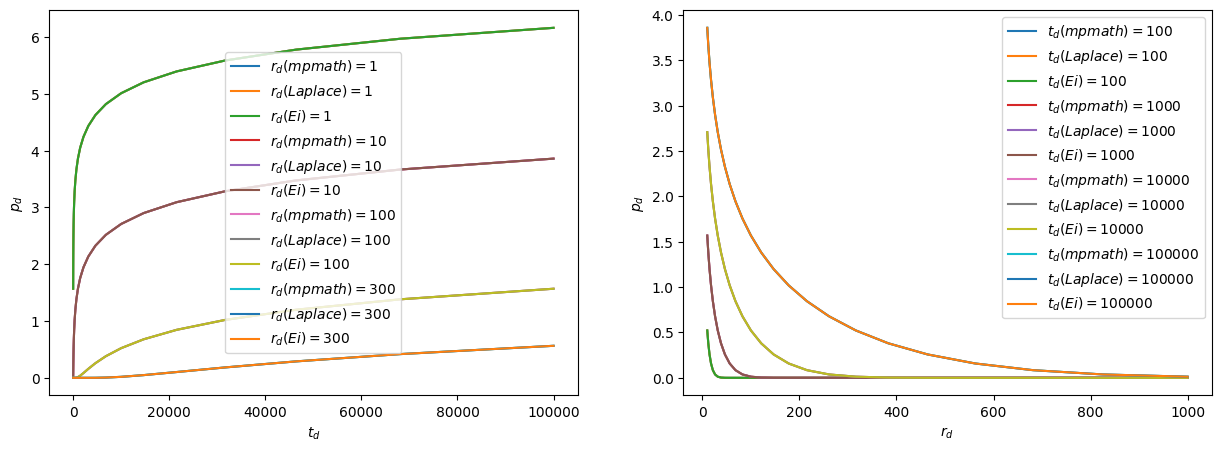

In [36]:
"""
Построим графики решений от расстояния и времени для численно-аналитического 
решения и аналитического решения.
Строим три решения, чтобы убедиться, что они совпадают.
"""
# зададим диапазоны изменения параметров для построения графиков
# ограничиваемся 25 точками для графиков
# для ускорения расчетов
td_arr = np.logspace(1,5,25) 
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,25)
rd_list = [1, 10, 100, 300]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_line_source_mpmath_vect(td_arr, rd=ri), 
             label = f'$r_d (mpmath)={ri:.0f}$')
    ax1.plot(td_arr, 
             pd_line_source_inv(td_arr, rd=ri), 
             label = f'$r_d (Laplace)={ri:.0f}$')
    ax1.plot(td_arr, 
             pd_line_source_ei(td_arr, rd=ri), 
             label = f'$r_d (Ei)={ri:.0f}$')
for ti in td_list:
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_mpmath_vect(ti, 
                                rd=ri) for ri in rd_arr]), 
             label = f'$t_d (mpmath)={ti:.0f}$')
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_inv(ti, 
                                rd=ri) for ri in rd_arr]), 
             label = f'$t_d (Laplace)={ti:.0f}$')
    ax2.plot(rd_arr, 
             np.squeeze([pd_line_source_ei(ti, 
                                rd=ri) for ri in rd_arr]), 
             label = f'$t_d (Ei)={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

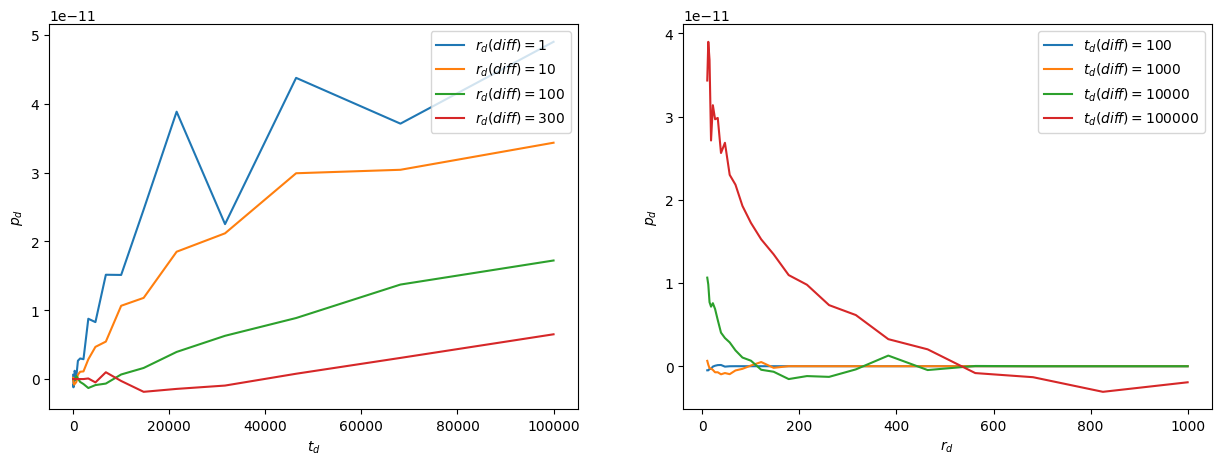

In [38]:
"""
оценим погрешности расчета с использованием аналитического решения
и решения с численным обратным преобразованием Лапласа
"""
td_arr = np.logspace(1,5,25)
td_list = [100, 1000, 10000, 100000]
rd_arr = np.logspace(1,3,25)
rd_list = [1, 10, 100, 300]

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(td_arr, 
             pd_line_source_mpmath_vect(td_arr, rd=ri) - 
             pd_line_source_ei(td_arr, rd=ri), 
             label = f'$r_d (diff)={ri:.0f}$')

for ti in td_list:
    ax2.plot(rd_arr, 
     np.squeeze([pd_line_source_mpmath_vect(ti, 
                                       rd=ri) for ri in rd_arr]) -
     np.squeeze([pd_line_source_ei(ti, rd=ri) for ri in rd_arr]), 
     label = f'$t_d (diff)={ti:.0f}$')

# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

Построенные графики показывают, что алгоритм Стефеста для численного обратного преобразования Лапласа дает погрешность до 2e-5 или примерно в пятом знаке после запятой, что  является удовлетворительным результатом для большинства практических расчетов. 

In [39]:
"""
оценим скорости проведения расчетов различными методами
"""
%timeit pd_line_source_ei(1,1)
%timeit pd_line_source_inv(1,1)
%timeit pd_line_source_mpmath(1,1)

597 ns ± 1.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
21.8 μs ± 534 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
38.5 ms ± 37.4 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Расчет показывает, что использование mpmath требует больше времени для проведения расчетов. При этом использование mpmath может повысить точность расчетов. Расчет с использованием анатилического решения наиболее быстрый. 

## Определение функций для перевода размерных и безразмерных величин

In [40]:
"""
Определим функции для перевода размерных переменных в безразмерные 
и обратно. Функции пригодятся потом для построения графиков 
и ведения расчетов

При наименовании функций придерживаемся следующих соглашений:
сначала идет название того, что считаем,
в конце указывается размерность результата, если это уместно.
"""

def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, 
                 k_mD=10, 
                 phi=0.2, 
                 mu_cP=1, 
                 ct_1atm=1e-5, 
                 rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, 
              k_mD=10, 
              phi=0.2, 
              mu_cP=1, 
              ct_1atm=1e-5, 
              rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * 
                                     ct_1atm * rw_m * rw_m) 

def p_from_pd_atma(pd, 
                   k_mD=10, 
                   h_m=10, 
                   q_sm3day=20, 
                   b_m3m3=1.2, 
                   mu_cP=1, 
                   pi_atma=250):
    """
    перевод безразмерного давления в размерное, 
    результат в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - 18.41*pd*q_sm3day*b_m3m3*mu_cP/k_mD/h_m 

def pd_from_p(p_atma, 
              k_mD=10, 
              h_m=10, 
              q_sm3day=20, 
              b_m3m3=1.2, 
              mu_cP=1, 
              pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41*q_sm3day*
                                 b_m3m3*mu_cP)*k_mD*h_m 

def qd_from_q(q:float,
              q_ref:float=1):
    return q / q_ref

def q_from_qd(qd:float,
              q_ref:float=1):
    return qd * q_ref

## Графики сравнения реализаций решений линейного стока в размерных координатах

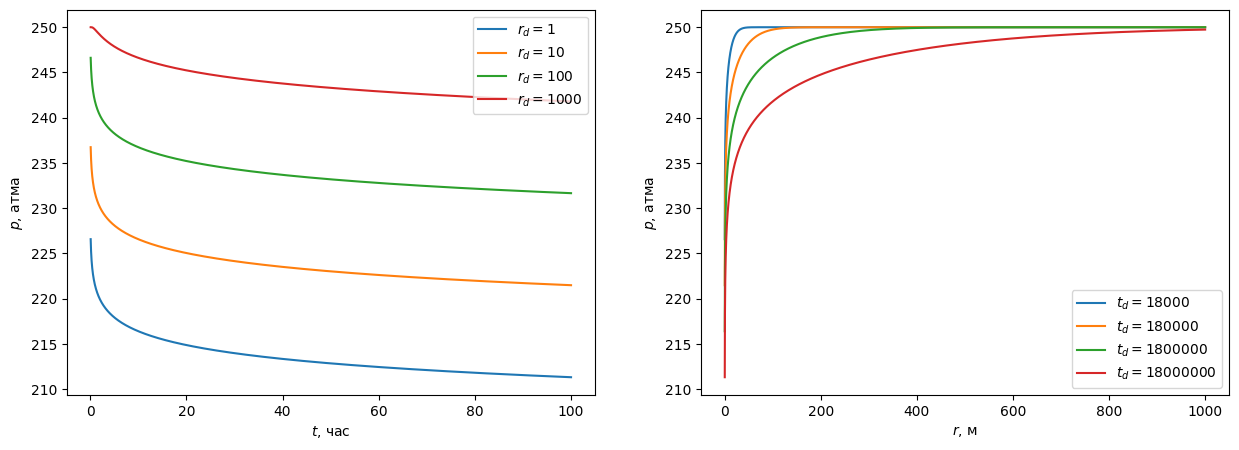

In [41]:
"""
Построим графики решений от расстояния и времени для аналитического 
решения в размерных координатах.
При построении оставим параметры скважины по умолчанию.
"""
# зададим диапазоны изменения параметров для построения графиков
t_arr_hr = np.logspace(np.log10(0.1), np.log10(100), 1000)
td_arr = td_from_t(t_arr_hr)

t_list_hr = np.array([0.1, 1, 10, 100])
td_list = td_from_t(t_list_hr)

r_arr_m = np.logspace(np.log10(0.1), np.log10(1000), 1000)
rd_arr = rd_from_r(r_arr_m)

r_list = np.array([0.1, 1, 10, 100])
rd_list = rd_from_r(r_list)

# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in rd_list:
    ax1.plot(t_arr_hr, 
             p_from_pd_atma(pd_line_source_ei(td_arr, rd=ri)), 
             label = f'$r_d={ri:.0f}$')
for ti in td_list:
    ax2.plot(r_arr_m, 
             np.squeeze([p_from_pd_atma(pd_line_source_ei(ti, rd=ri)) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t$, час')
ax1.set_ylabel('$p$, атма')
ax1.legend()
ax2.set_xlabel('$r$, м')
ax2.set_ylabel('$p$, атма')
ax2.legend()
plt.show()

При переводе значений давления в размерные величины можно получить, что ошибка в пятом знаке после запятой соответствует примерно 10 Па.

## Численная реализация для решения с конечным радиусом скважины с постоянным дебитом

Решение для конечного радиуса скважины в пространстве Лапласа будет иметь вид

$$ \widetilde{p_D}(u) = \frac{K_0 \left( r_D \sqrt u  \right)}{u \sqrt u  K_1(\sqrt u)} \tag{23} $$

где 

$K_0$, $K_1$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированные функции Бесселя&nbsp;</a>

In [42]:
"""
построим python функцию реализующую численно-аналитическое решение 
уравнения фильтрации для радиального притока к скважине 
конечного радиуса с использованием численного
обратного преобразования Лапласа 
"""
# пример функции реализующий расчет решения в пространстве Лапласа
def pd_lapl_finite_rw(u, rd=1.):
    """
    расчет решения c конечным радиусом скважины для безразмерного
    давления в пространстве Лапласа
    u - переменная пространства Лапласа
    rd- безразмерное расстояние от центра скважины
    """
    # полезно учесть, что при u>5e5 выражение kn(1, u05) обратится 
    # в ноль и будет деление на ноль, но если принудительно сделать 
    # там выражение равное нулю, обратное преобразование Лапласа
    # может выдавать очень странные результаты, поэтому лучше пока 
    # оставить как есть
    u05 = u**0.5
    return np.divide(scipy.special.kn(0, rd * u05) , 
                     (u * u05 *  scipy.special.kn(1, u05)))


# функция расчета безразмерного давления с использованием 
# численного обратного преобразования Лапласа
def pd_finite_rw_inv(td, rd=1.):
    """
    расчет решения c конечным радиусом скважины для безразмерного
    давления на основе численного обратного преобразования Лапласа
    (алгоритм Стефеста)
    td - безразмерное давление, число или numpy массив
    rd - безразмерный радиус, по умолчанию rd=1 - соответствует 
         давлению на забое
    результат массив массивов давления от времени
    """
    pd_inv = anaflow.get_lap_inv(pd_lapl_finite_rw, rd=rd)
    return pd_inv(td)

## Сравнение решений линейного стока и конечного радиуса скважины

Построим графики сравнения решений линейного стока и решения с учетом конечного радиуса скважины. Графики будем строить для фиксированного расстояния в зависимости от времени. 

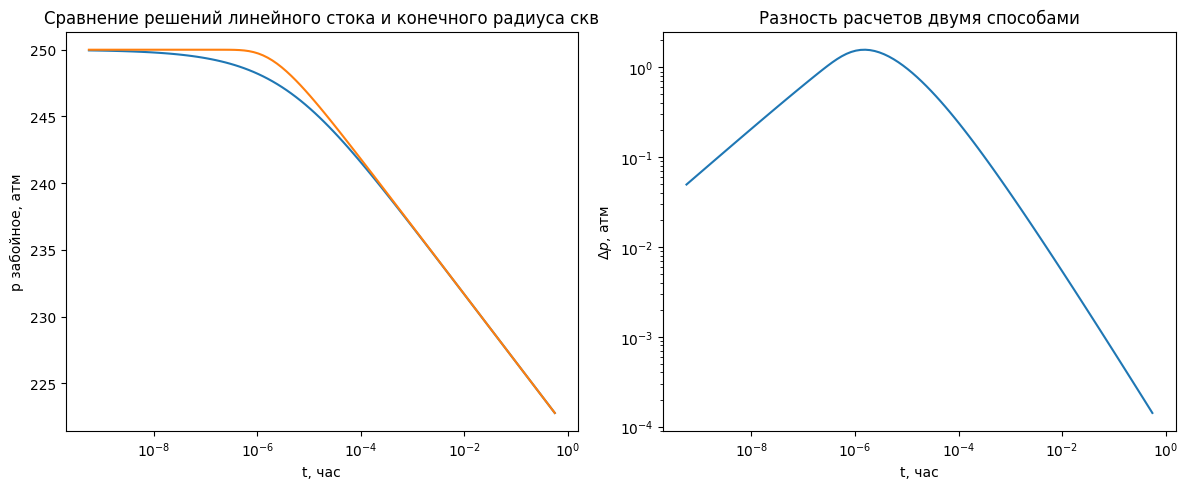

In [43]:
"""
построим график безразмерного давления от расстояния 
в безразмерных переменных двумя способами и их разницу также
"""
td_arr = np.logspace(-4, 5 ,100)
rd = 1  # забойное давление

pd_finite_rw_inv_arr = pd_finite_rw_inv(td_arr, rd)
pd_line_source_inv_arr = pd_line_source_inv(td_arr, rd) 

# при построении используем векторный расчет
plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_finite_rw_inv_arr))
ax1.plot(t_from_td_hr(td_arr), p_from_pd_atma(pd_line_source_inv_arr))
ax1.set_title("Сравнение решений линейного стока и конечного радиуса скв")
ax1.set_xscale('log')
ax1.set_xlabel("t, час")
ax1.set_ylabel("p забойное, атм")

ax2.plot(t_from_td_hr(td_arr), 
         p_from_pd_atma(pd_line_source_inv_arr) - 
         p_from_pd_atma(pd_finite_rw_inv_arr))
ax2.set_title("Разность расчетов двумя способами")
ax2.set_xscale('log')
ax2.set_xlabel("t, час")
ax2.set_ylabel(r"$\Delta p$, атм")
ax2.set_yscale('log')
plt.tight_layout()
plt.show()

Видно, что для забойного давления заметные расхождения наблюдаются для времен порядка 0.001 часа или 3 секунд. Следует помнить, что данная размерная оценка получена для заданных по умолчанию параметров скважин и изменение проницаемости или сжимаемости оценку изменит. Однако проведя эксперименты можно убедиться что время для которого расхождения будет заметно все равно останется относительно малым. В этом смысле оценка сходимости решений в безразмерных переменных предпочтительна (не будет зависеть от размерных парамтеров)

Посмотрим, что будет происходить вдали от скважины - меняем только параметр `rd`

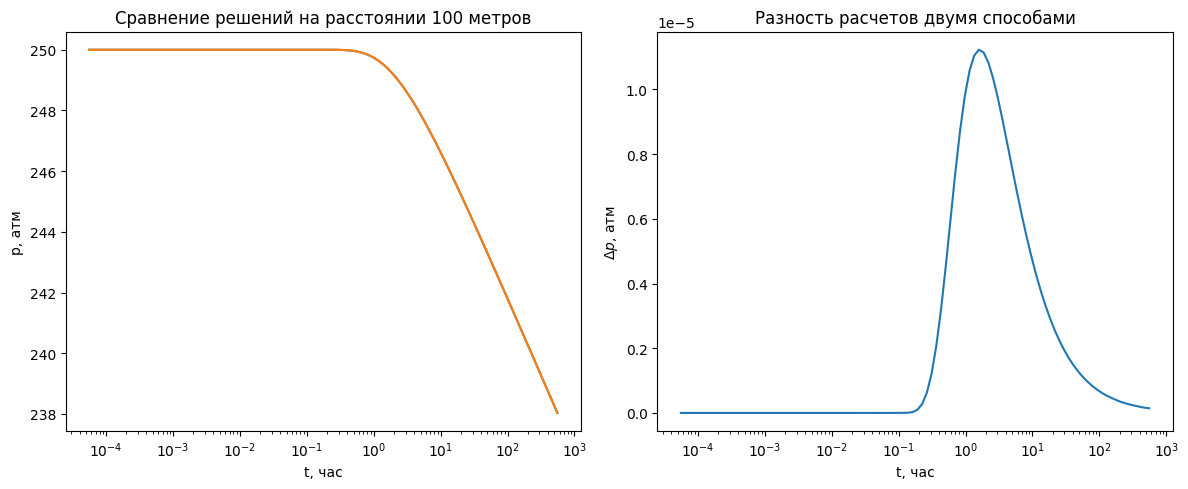

In [44]:
"""
построим график безразмерного давления от расстояния в безразмерных переменных
двумя способами и их разницу также
"""
td_arr = np.logspace(1, 8 ,100)
rd = 1000  # забойное давление
# при построении используем векторный расчет
plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(t_from_td_hr(td_arr), 
         p_from_pd_atma(pd_finite_rw_inv(td_arr, rd)) )
ax1.plot(t_from_td_hr(td_arr), 
         p_from_pd_atma(pd_line_source_inv(td_arr, rd)) )
ax1.set_title("Сравнение решений на расстоянии {:.0f} метров".format(r_from_rd_m(rd)))
ax1.set_xscale('log')
ax1.set_xlabel("t, час")
ax1.set_ylabel("p, атм")

ax2.plot(t_from_td_hr(td_arr),
         p_from_pd_atma(pd_line_source_inv(td_arr, rd)) - 
         p_from_pd_atma(pd_finite_rw_inv(td_arr, rd)) ) 
                               
ax2.set_title("Разность расчетов двумя способами")
ax2.set_xscale('log')
ax2.set_xlabel("t, час")
ax2.set_ylabel(r"$\Delta p$, атм")
plt.tight_layout()
plt.show()

Видно что вдали от скважины заметных расхождений в решениях нет. Поэтому для решения задач по анализу взаимного влияния скважин широкое применение получило относительно простое решение линейного стока.

# Принцип суперпозиции. Решение для произвольной истории дебитов (ступенчатое изменение дебита)

Для расчета изменения давления при переменном дебите введем произвольное референсное значение дебита $ q_{ref} $ (например первое не нулевое значение дебита при запуске скважины). Используем это значение для определения безразмерного давления.
$$ p_D = \frac{kh}{ 18.41 q_{ref} B \mu} \left( p_i - p \right) \tag{5} $$

и безразмерного дебита 

$$q_D = \frac{q}{q_{ref}} \tag{6}$$

Тогда, используя принцип суперпозиции, можем выписать выражение для изменения давления на скважине и вокруг нее для произвольного момента времени

$$P_{mr.D}(t_D, r_D) = \sum_i \left[ q_{D(i)}-q_{D(i-1)} \right] \cdot p_D\left(t_D-t_{D(i)}, r_D\right)\cdot \mathcal{H}(t_D-t_{D(i)}) \tag{7} $$

где

* $i$ - индекс значения дебита в таблице изменения дебитов
* $q_{D(i)}$ - безразмерный дебит с номером $i$, который стартует в момент времени $t_i$. Для первого момента времени $i$ дебит следующий перед ним считается равным нулю
* $t_{D(i)}$ - безразмерный момент времени - включения дебита с номером $i$
* $t_{D}$ - безразмерный момент времени для которого проводится расчет
* $\mathcal{H}$ - ступенчатая [функция Хевисайда](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0%20%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2,%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%B8%20%D1%8D%D0%BC%D0%BF%D0%B8%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.)
* $p_D\left(t\right)$ - зависимость безразмерного давление от времени - решение задачи запуска скважины с постоянным единичным дебитом
* $P_{mr.D} $ - безразмерное давление $P_{mr.D}(t_D, r_D)$ учитывающее историю изменения дебитов скважины


In [45]:
# создадим историю изменения дебитов 

t_history = np.array([ 0., 2., 24. ], dtype=np.float64) 
q_history = np.array([10., 5., 0.], dtype=np.float64)

# массивы должны быть одной и той же длины

def pd_superposition(td, td_hist, qd_hist, 
                     rd=1,
                     pd_func=pd_line_source_ei):
    """
    расчет безразмерного давления для последовательности безразмерных дебитов
    td -  время расчета после запуска, безразмерное
    td_hist - массив времен изменения режимов работы скважин, безразмерное
    qd_hist - массив дебитов установленных после изменения режима работы, безразмерное
    rd - безразмерное расстояние от скважины для которого проводится расчет
    pd_func - функция расчета решения для единичного дебита
    """
    # принудительно добавим нули во входные массивы, чтобы учесть запуск скважины
    qdh = np.hstack([0, qd_hist])
    tdh = np.hstack([0, td_hist])
    # построим дебиты виртуальных скважин - разности реальных дебитов при переключении
    delta_qd = np.hstack([0, np.diff(qdh)])
    # референсный безразмерный дебит это 1
    
    # векторная магия - время может быть вектором и переключения дебитов тоже вектор
    # надо организовать сумму по временам, каждая из котороых сумма по переключениям
    # делаем при помощи расчета meshgrid и поиска накопленных сумм
    qd_v, td_v =np.meshgrid(delta_qd, td)
    # используем куммулятивную сумму numpy для того что суммировать результаты
    dpd = np.cumsum(qd_v * pd_func(td=(td_v - tdh),
                                   rd=rd) * np.heaviside((td_v - tdh), 1),1 )
    # последний столбец - полная сумма, которая нужна в качестве результата
    return dpd[:,-1]


def q_superposition(t, t_hist, q_hist):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    """
    def interpolate_constant(x, xp, yp):
        indices = np.searchsorted(xp, x, side='right')
        y = np.concatenate(([0], yp))
        return y[indices]

    q=[]
    for ti in t:
        q.append(interpolate_constant(ti, t_hist, q_hist))
    return q

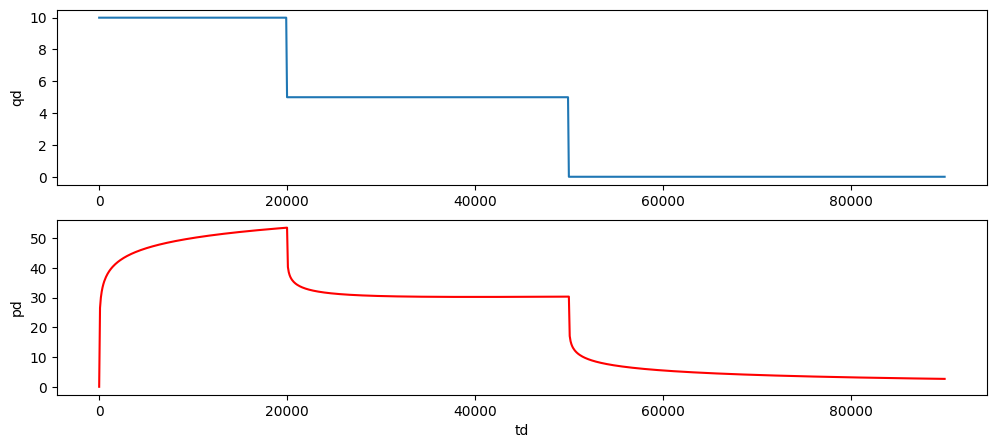

In [46]:
td_arr = np.linspace(1e-3, 9e4, 1000)


td_history = np.array([ 0., 2e4, 5e4 ], dtype=np.float64) 
qd_history = np.array([10., 5., 0.], dtype=np.float64)

plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(td_arr, q_superposition(td_arr, td_history, qd_history)) 
ax2.plot(td_arr, pd_superposition(td_arr, td_history, qd_history, rd=1), color='red') 
ax2.set_xlabel('td')
ax1.set_ylabel('qd')
ax2.set_ylabel('pd')
plt.show()

In [47]:
def p_superposition_atma(t_hr, t_hist_hr, q_hist_sm3day,
                         k_mD=10, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250, phi=0.2, 
                         ct_1atm=1e-05, rw_m=0.1):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    k_mD=10 - проницаемость, мД, 
    h_m=10 - мощность пласта, м, 
    b_m3m3=1.2 - объемный коэффициент, м3/м3, 
    mu_cP=1 - вязкость нефти, сП, 
    pi_atma=250 - начальное давление, атм, 
    phi=0.2 - пористость, доли единиц, 
    ct_1atm=1e-05 - общая сжимаемость, 1/атм, 
    rw_m=0.1 - радиус скважины
    """
    q_ref=1.
    return p_from_pd_atma(pd_superposition(td_from_t(t_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m),
                                           td_from_t(t_hist_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m),
                                           q_hist_sm3day / q_ref, 
                                           1), 
                          k_mD=10, h_m=10, q_sm3day=q_ref, b_m3m3=1.2, mu_cP=1, pi_atma=250)



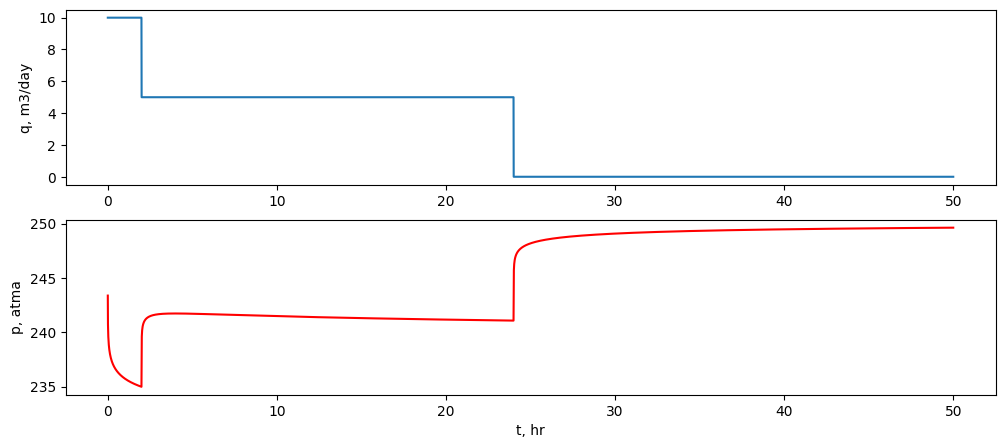

In [48]:
t_arr = np.arange(1e-3, 50, 1e-2)
plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history), color='red') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

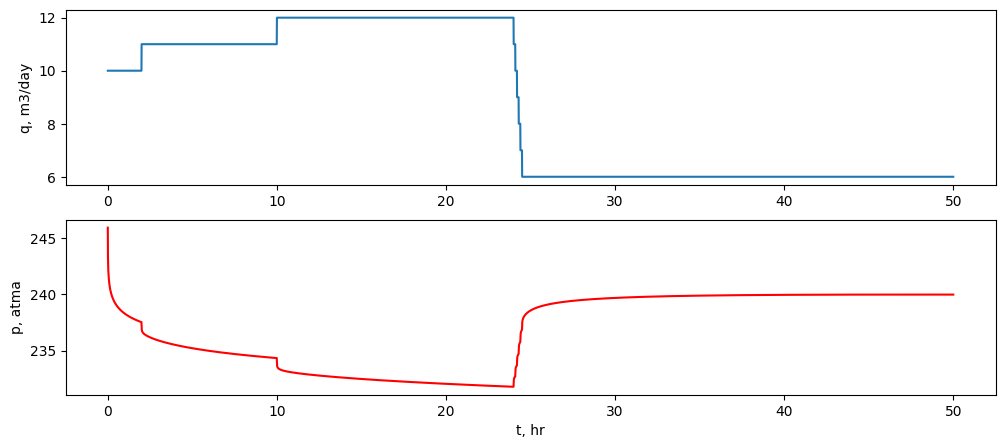

In [49]:

t_history = np.array([0, 2, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([10, 11, 12, 11, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history, 1), color='red') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

# Решение для конечного круглого пласта с постоянным давлением на контуре. 

Частное решение строится за счет поиска параметров $A$ и $B$ для общего решения так, чтобы они удовлетворяли граничным условиям. 

1. Граничное условия на внешнем контуре с постоянным давлением 

$$p_D(r_e, t_D) = 0 $$

в пространстве Лапласа преобразуется в следующее

$$\widetilde{p}_D(r_e, u) = 0$$

2. Граничное условие на скважине

$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ \partial p_D(r_D, t_D)}{\partial r_D} \right] = -1$$

в пространстве Лапласа  с учетом выражения преобразуется к

$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ d \tilde{p}_D}{d r_D} \right] = -\dfrac{1}{u}$$ 


In [50]:
"""
выведем общее решение, построенное ранее
"""
soln2

Eq(\widetilde{p_d}(r_d), A*besselk(0, r_d*sqrt(u)) + B*besseli(0, r_d*sqrt(u)))

In [51]:
"""
запишем граничное условие 1 на внешней границе
круговой зоны дренирования 
"""
# введем переменную для радиуса круговой зоны
r_e = sp.symbols('r_e', positive=True)
# запишем граничное условие 1
eq1 = sp.Eq(soln2.subs({r_d: r_e}).rhs, 0)
eq1

Eq(A*besselk(0, r_e*sqrt(u)) + B*besseli(0, r_e*sqrt(u)), 0)

In [52]:
"""
запишем граничное условие 2 на скважине
соответствующее постоянному дебиту скважины
"""
eq2 = sp.Eq(r_d * soln2.rhs.diff(r_d), -1/u).subs(r_d, 1)
eq2

Eq(-A*sqrt(u)*besselk(1, sqrt(u)) + B*sqrt(u)*besseli(1, sqrt(u)), -1/u)

In [53]:
"""
Найдем функции A, B удовлетворяющие граничным условиям 1 и 2
"""
sol_AB = sp.solve([eq1,eq2], [A,B])
sol_AB

{A: besseli(0, r_e*sqrt(u))/(u**(3/2)*besseli(0, r_e*sqrt(u))*besselk(1, sqrt(u)) + u**(3/2)*besseli(1, sqrt(u))*besselk(0, r_e*sqrt(u))),
 B: -besselk(0, r_e*sqrt(u))/(u**(3/2)*besseli(0, r_e*sqrt(u))*besselk(1, sqrt(u)) + u**(3/2)*besseli(1, sqrt(u))*besselk(0, r_e*sqrt(u)))}

In [54]:
"""
построим решение с учетом найденных ранее функций
"""
sol_re_const_p = soln2.subs(A, sol_AB[A]).subs(B, sol_AB[B]).simplify()  
sol_re_const_p

Eq(\widetilde{p_d}(r_d), (-besseli(0, r_d*sqrt(u))*besselk(0, r_e*sqrt(u)) + besseli(0, r_e*sqrt(u))*besselk(0, r_d*sqrt(u)))/(u**(3/2)*(besseli(0, r_e*sqrt(u))*besselk(1, sqrt(u)) + besseli(1, sqrt(u))*besselk(0, r_e*sqrt(u)))))

Таким образом получено решение для постоянного давления на круговой границе вокруг скважины 
\begin{equation}
\displaystyle \widetilde{p_{d}}{\left(r_{d} \right)} = \frac{- I_{0}\left(r_{d} \sqrt{u}\right) K_{0}\left(r_{e} \sqrt{u}\right) + I_{0}\left(r_{e} \sqrt{u}\right) K_{0}\left(r_{d} \sqrt{u}\right)}{u^{\frac{3}{2}} \left(I_{0}\left(r_{e} \sqrt{u}\right) K_{1}\left(\sqrt{u}\right) + I_{1}\left(\sqrt{u}\right) K_{0}\left(r_{e} \sqrt{u}\right)\right)} 
\end{equation}

Ипользуя подход показанный выше можно построить графики зависимости безразмерного давления от времени и расстояния для этого решения с использованием numpy и scipy функций

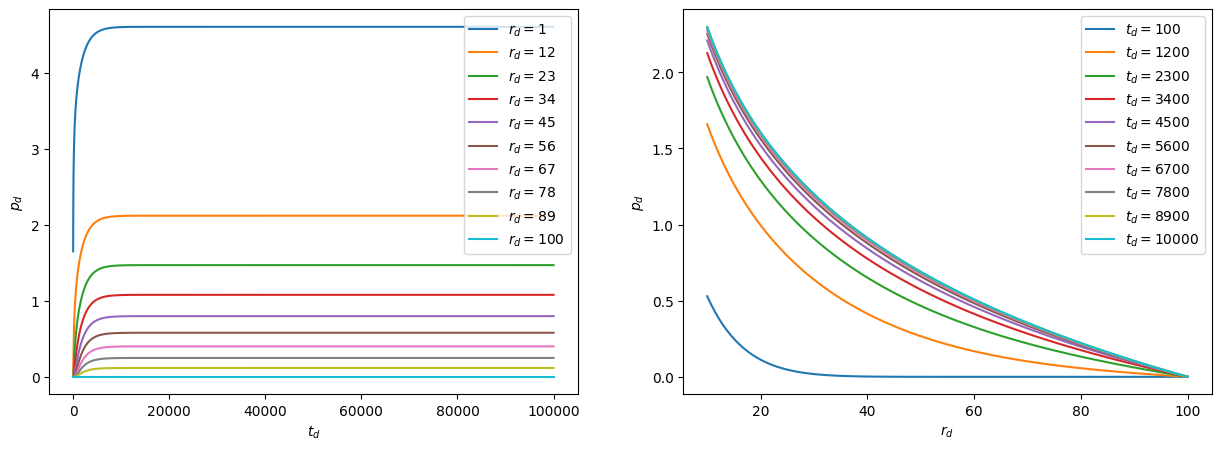

In [55]:
"""
сгенерируем функцию python для найденного решения
и построим графики зависимости давления от расстояния и времени
"""
# преобразование sympy выражения в lambda функцию 
soln_re_const_p_numpy = sp.lambdify([u, r_d, r_e], 
                                    sol_re_const_p.rhs, 
                                    modules = ['numpy', 'scipy'])

# после преобразования lambda функцию можно 
# использовать для проведения расчетов как обычныую функцию

# определим функцию для расчета обратного преобразования Лапласа
# отдельная функция удобно чтобы передавать r_d второй параметр
def soln_re_const_p_inv_lapl_numpy(t_d=1000, r_d=1, r_e=100):
    sol_lap = anaflow.get_lap_inv(soln_re_const_p_numpy,  
                                  r_d=r_d, 
                                  r_e=r_e)
    return sol_lap(t_d)

# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
rd_arr = np.logspace(1,2,100)
re=100
# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in np.linspace(1,100,10):
    ax1.plot(td_arr, 
             soln_re_const_p_inv_lapl_numpy(td_arr, r_d=ri, r_e=re), 
             label = f'$r_d={ri:.0f}$')
for ti in np.linspace(1e2, 1e4,10):
    ax2.plot(rd_arr, 
     np.squeeze([soln_re_const_p_inv_lapl_numpy(ti, r_d=ri, r_e=re) for ri in rd_arr]), 
     label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [56]:
"""
выведем информацию по функции, чтобы вытащить ее реализацию
"""
??soln_re_const_p_numpy

Signature: soln_re_const_p_numpy(u, r_d, r_e)
Docstring:
Created with lambdify. Signature:

func(u, r_d, r_e)

Expression:

(-besseli(0, r_d*sqrt(u))*besselk(0, r_e*sqrt(u)) + besseli(0,...

Source code:

def _lambdifygenerated(u, r_d, r_e):
    return (-iv(0, r_d*sqrt(u))*kv(0, r_e*sqrt(u)) + iv(0, r_e*sqrt(u))*kv(0, r_d*sqrt(u)))/(u**(3/2)*(iv(0, r_e*sqrt(u))*kv(1, sqrt(u)) + iv(1, sqrt(u))*kv(0, r_e*sqrt(u))))


Imported modules:
Source:   
def _lambdifygenerated(u, r_d, r_e):
    return (-iv(0, r_d*sqrt(u))*kv(0, r_e*sqrt(u)) + iv(0, r_e*sqrt(u))*kv(0, r_d*sqrt(u)))/(u**(3/2)*(iv(0, r_e*sqrt(u))*kv(1, sqrt(u)) + iv(1, sqrt(u))*kv(0, r_e*sqrt(u))))
File:      c:\projects\welltest_examples\jupyter\<lambdifygenerated-7>
Type:      function

In [57]:
"""
построим python функции реализующие расчет 
решения в пространстве Лапласа и в обычном пространстве
"""
# для упрощения реалиции импортируем названия
# специальных функций 
from scipy.special import iv, kv, kn
from numpy import sqrt

def pd_lapl_circle_const_press(u, r_d=1., r_ed = 1000):
    """
    решения для кругового пласта с постоянным давлением
    на границе в пространстве Лапласа.
    u - переменная пространства Лапласа
    r_d - безразмерное расстояние от центра скважины
    r_ed - внешний радиус кругового пласта
    """
    
    return ((-iv(0, r_d * sqrt(u)) * kv(0, r_ed * sqrt(u)) + 
             iv(0, r_ed * sqrt(u)) * kv(0, r_d * sqrt(u))) / 
            (u**(3/2) * (iv(0, r_ed*sqrt(u)) * kv(1, sqrt(u)) + 
                       iv(1, sqrt(u))*kv(0, r_ed * sqrt(u)))))

def pd_circle_const_press_inv(td, r_d=1., r_ed = 1000):
    """
    расчет решения для кругового пласта с постоянным давлением
    на границе на основе численного обратного преобразования 
    Лапласа (алгоритм Стефеста)
    td - безразмерное давление, число или numpy массив
    r_d - безразмерное расстояние от центра скважины
    r_ed - внешний радиус
    результат массив массивов давления от времени
    """
    pd_inv = anaflow.get_lap_inv(pd_lapl_circle_const_press, 
                                 r_d=r_d, 
                                 r_ed=r_ed)
    return pd_inv(td)

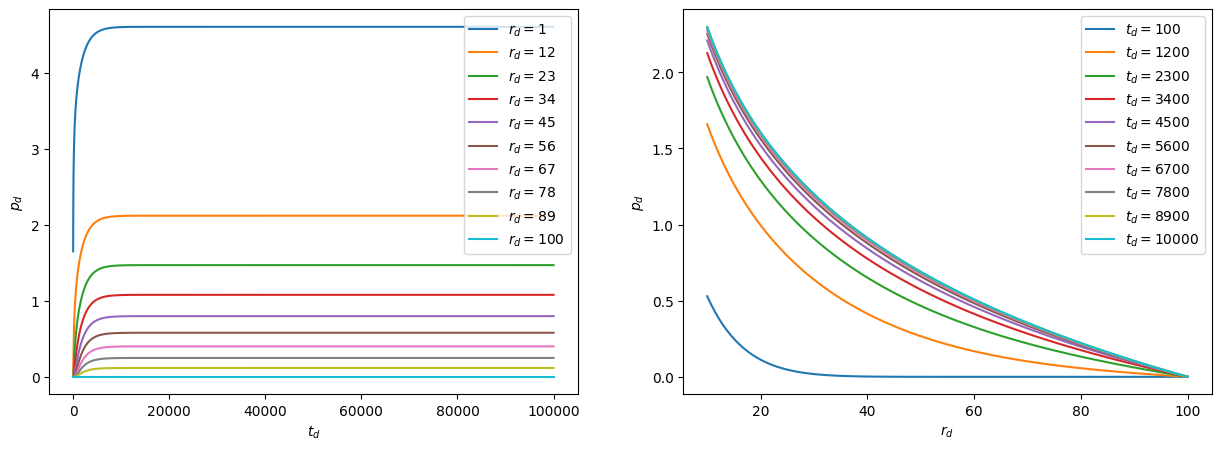

In [58]:
"""
Для проверки построенных python функций построим
графики зависимости безразмерного давления от расстояния
и времени
"""

# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
rd_arr = np.logspace(1,2,100)
re=100
# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in np.linspace(1,100,10):
    ax1.plot(td_arr, 
             pd_circle_const_press_inv(td_arr, r_d=ri, r_ed=re), 
             label = f'$r_d={ri:.0f}$')
for ti in np.linspace(1e2, 1e4,10):
    ax2.plot(rd_arr, 
             np.squeeze([pd_circle_const_press_inv(ti, 
                                   r_d=ri, 
                                   r_ed=re) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

# Решение для конечного круглого пласта с замкнутой границей.

Частное решение строится за счет поиска параметров $A$ и $B$ для общего решения уравнения фильтрации в пространстве Лапласа так, чтобы они удовлетворяли граничным условиям. 

1. Граничное условия на внешнем контуре с замкнутой границей

$$\left( \frac{d p_D}{d r_d}\right)_{r_d=r_e} = 0$$

в пространстве Лапласа преобразуется в следующее

$$\left( \frac{ \tilde{p}_D(r_d, u)}{d r_d}\right)_{r_d=r_e} = 0$$

2. Граничное условие на скважине

$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ \partial p_D(r_D, t_D)}{\partial r_D} \right] = -1 $$

в пространстве Лапласа с учетом выражения преобразуется к

$$\lim_{r_D \to r_{wD}} \left[ r_D \dfrac{ d \tilde{p}_D}{d r_D} \right] = -\dfrac{1}{u}  $$ 


In [59]:
"""
запишем граничное условие 1 на внешней границе
круговой зоны дренирования 
"""
r_e = sp.symbols('r_e', positive=True)
eq1 = sp.Eq(soln2.rhs.diff(r_d).subs(r_d, r_e),0)
eq1

Eq(-A*sqrt(u)*besselk(1, r_e*sqrt(u)) + B*sqrt(u)*besseli(1, r_e*sqrt(u)), 0)

In [60]:
"""
запишем граничное условие 2 на скважине
соответствующее постоянному дебиту скважины
"""
eq2 = sp.Eq(r_d * soln2.rhs.diff(r_d), -1/u).subs(r_d, 1)
eq2

Eq(-A*sqrt(u)*besselk(1, sqrt(u)) + B*sqrt(u)*besseli(1, sqrt(u)), -1/u)

In [61]:
"""
найдем функции A,B удовлетворяющие граничному
условию
"""
sol_AB = sp.solve([eq1,eq2], [A,B])
sol_AB

{A: besseli(1, r_e*sqrt(u))/(-u**(3/2)*besseli(1, sqrt(u))*besselk(1, r_e*sqrt(u)) + u**(3/2)*besseli(1, r_e*sqrt(u))*besselk(1, sqrt(u))),
 B: besselk(1, r_e*sqrt(u))/(-u**(3/2)*besseli(1, sqrt(u))*besselk(1, r_e*sqrt(u)) + u**(3/2)*besseli(1, r_e*sqrt(u))*besselk(1, sqrt(u)))}

In [62]:
"""
построим решение
"""
sol_re_close = soln2.subs(A, sol_AB[A]).subs(B, sol_AB[B]).simplify()  
sol_re_close

Eq(\widetilde{p_d}(r_d), (besseli(0, r_d*sqrt(u))*besselk(1, r_e*sqrt(u)) + besseli(1, r_e*sqrt(u))*besselk(0, r_d*sqrt(u)))/(u**(3/2)*(-besseli(1, sqrt(u))*besselk(1, r_e*sqrt(u)) + besseli(1, r_e*sqrt(u))*besselk(1, sqrt(u)))))

Таким образом получено решение для замкнутой круговой границы вокруг скважины 
\begin{equation}
\displaystyle \widetilde{p_{d}}{\left(r_{d} \right)} = \frac{I_{0}\left(r_{d} \sqrt{u}\right) K_{1}\left(r_{e} \sqrt{u}\right) + I_{1}\left(r_{e} \sqrt{u}\right) K_{0}\left(r_{d} \sqrt{u}\right)}{u^{\frac{3}{2}} \left(- I_{1}\left(\sqrt{u}\right) K_{1}\left(r_{e} \sqrt{u}\right) + I_{1}\left(r_{e} \sqrt{u}\right) K_{1}\left(\sqrt{u}\right)\right)} 
\end{equation}
Ипользуя подход показанный выше можно построить графики зависимости безразмерного давления от времени и расстояния для этого решения с использованием numpy и scipy функций

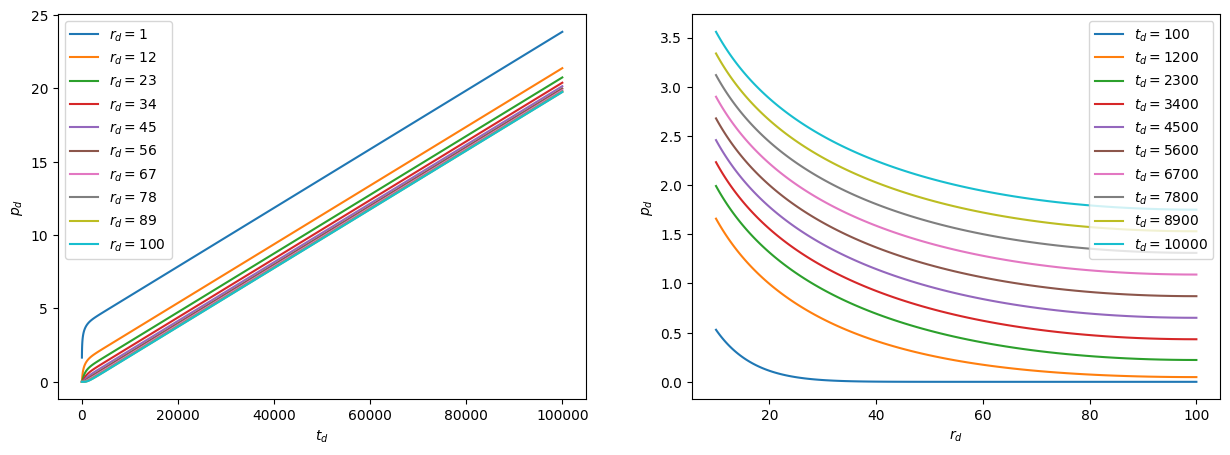

In [63]:
"""
Построим графики для проверки решения
"""

# преобразование sympy выражения в lambda функцию 
soln_re_close_numpy = sp.lambdify([u, r_d, r_e], 
                          sol_re_close.rhs, 
                          modules = ['numpy', 'scipy'])

# после преобразования lambda функцию можно 
# использовать для проведения расчетов как обычныую функцию

# определим функцию для расчета обратного преобразования Лапласа
# отдельная функция удобно чтобы передавать r_d второй параметр
def soln_re_close_inv_lapl_numpy(t_d=1000, r_d=1, r_e=100):
    sol_lap = anaflow.get_lap_inv(soln_re_close_numpy,  
                                  r_d=r_d, 
                                  r_e=r_e)
    return sol_lap(t_d)

# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
rd_arr = np.logspace(1,2,100)
re=100
# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in np.linspace(1,100,10):
    ax1.plot(td_arr, 
             soln_re_close_inv_lapl_numpy(td_arr, 
                                          r_d=ri, 
                                          r_e=re), 
             label = f'$r_d={ri:.0f}$')
for ti in np.linspace(1e2, 1e4,10):
    ax2.plot(rd_arr, 
             np.squeeze([soln_re_close_inv_lapl_numpy(ti, 
                              r_d=ri, 
                              r_e=re) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [64]:
"""
выведем информацию по функции, чтобы вытащить ее реализацию
"""
??soln_re_close_numpy

Signature: soln_re_close_numpy(u, r_d, r_e)
Docstring:
Created with lambdify. Signature:

func(u, r_d, r_e)

Expression:

(besseli(0, r_d*sqrt(u))*besselk(1, r_e*sqrt(u)) + besseli(1,...

Source code:

def _lambdifygenerated(u, r_d, r_e):
    return (iv(0, r_d*sqrt(u))*kv(1, r_e*sqrt(u)) + iv(1, r_e*sqrt(u))*kv(0, r_d*sqrt(u)))/(u**(3/2)*(-iv(1, sqrt(u))*kv(1, r_e*sqrt(u)) + iv(1, r_e*sqrt(u))*kv(1, sqrt(u))))


Imported modules:
Source:   
def _lambdifygenerated(u, r_d, r_e):
    return (iv(0, r_d*sqrt(u))*kv(1, r_e*sqrt(u)) + iv(1, r_e*sqrt(u))*kv(0, r_d*sqrt(u)))/(u**(3/2)*(-iv(1, sqrt(u))*kv(1, r_e*sqrt(u)) + iv(1, r_e*sqrt(u))*kv(1, sqrt(u))))
File:      c:\projects\welltest_examples\jupyter\<lambdifygenerated-8>
Type:      function

In [65]:
"""
построим python функции реализующие расчет 
решения в пространстве Лапласа и в обычном пространстве
"""

def pd_lapl_circle_closed(u, r_d=1., r_ed = 1000):
    """
    решения для кругового пласта с замкнутой границей 
    в пространстве Лапласа.
    u - переменная пространства Лапласа
    r_d - безразмерное расстояние от центра скважины
    r_ed - внешний радиус кругового пласта
    """
    
    return ((iv(0, r_d * sqrt(u)) * kv(1, r_ed * sqrt(u)) + 
            iv(1, r_ed * sqrt(u))*kv(0, r_d * sqrt(u)))/
            (u**(3/2)*(-iv(1, sqrt(u))*kv(1, r_ed * sqrt(u)) + 
                       iv(1, r_ed * sqrt(u)) * kv(1, sqrt(u)))))


def pd_circle_closed_inv(td, r_d=1., r_ed = 1000):
    """
    расчет решения для кругового пласта с замкнутой границей
    на основе численного обратного преобразования 
    Лапласа (алгоритм Стефеста)
    td - безразмерное давление, число или numpy массив
    r_d - безразмерное расстояние от центра скважины
    r_ed - внешний радиус
    результат массив массивов давления от времени
    """
    pd_inv = anaflow.get_lap_inv(pd_lapl_circle_closed, 
                                 r_d=r_d, 
                                 r_ed=r_ed)
    return pd_inv(td)

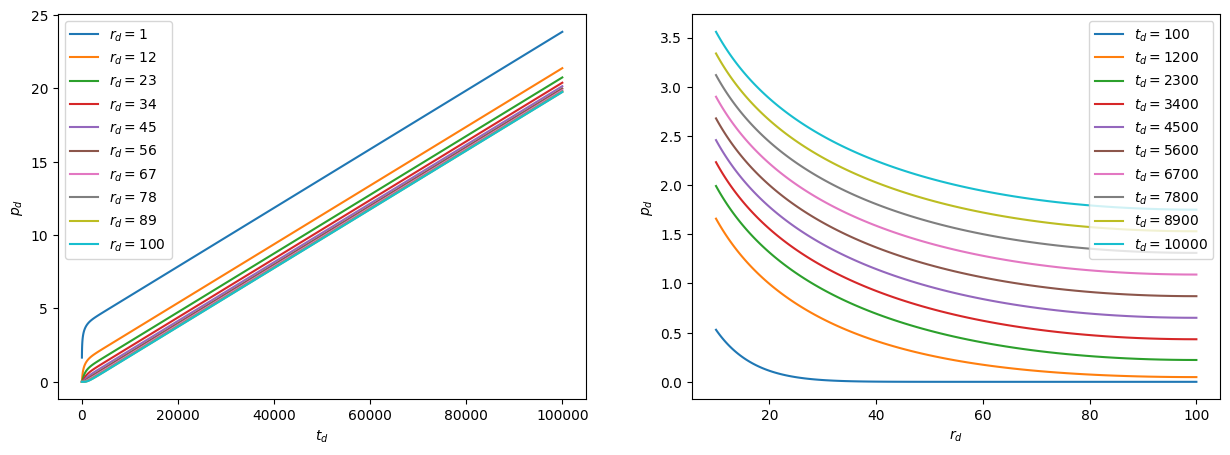

In [66]:
"""
Для проверки построенных python функций построим графики 
зависимости безразмерного давления от расстояния и времени
"""

# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
rd_arr = np.logspace(1,2,100)
re=100
# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in np.linspace(1,100,10):
    ax1.plot(td_arr, 
             pd_circle_closed_inv(td_arr, r_d=ri, r_ed=re), 
             label = f'$r_d={ri:.0f}$')
for ti in np.linspace(1e2, 1e4,10):
    ax2.plot(rd_arr, 
             np.squeeze([pd_circle_closed_inv(ti, 
                                   r_d=ri, 
                                   r_ed=re) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

## Решение с постоянным забойным давлением в бесконечном пласте

In [67]:
"""
Общее решение в пространстве Лапласа
"""
soln2

Eq(\widetilde{p_d}(r_d), A*besselk(0, r_d*sqrt(u)) + B*besseli(0, r_d*sqrt(u)))

In [68]:
"""
Граничное условие на скважине - постоянное забойное давление
"""
p_wd = sp.symbols('p_wD', real=True, positive=True)
# граничное условие на скважине
eq_boundary = sp.Eq(p_d(r_d,t_d) , p_wd)
display(eq_boundary)

Eq(p_d(r_d, t_d), p_wD)

In [69]:
"""
применим преобразование Лапласа к обеим частям граничного условия
"""
eq_boundary_Laplace = sp.Eq(sp.laplace_transform(eq_boundary.lhs, t_d, u,  noconds=True) ,  
                            sp.laplace_transform(eq_boundary.rhs, t_d, u,  noconds=True))
display(eq_boundary_Laplace)

Eq(LaplaceTransform(p_d(r_d, t_d), t_d, u), p_wD/u)

In [70]:
""" решение для бесконечного пласта """
soln3

Eq(\widetilde{p_d}(r_d), A*besselk(0, r_d*sqrt(u)))

In [71]:
""" найдем А """
eq_boundary_Laplace = sp.Eq(soln3.subs(r_d, 1).rhs, eq_boundary_Laplace.rhs)
eq_boundary_Laplace

Eq(A*besselk(0, sqrt(u)), p_wD/u)

In [72]:
""" найдем А """
sol_A = sp.solve(eq_boundary_Laplace, A)
display(sol_A)
sol_A = sol_A[0]
display(sol_A)

[p_wD/(u*besselk(0, sqrt(u)))]

p_wD/(u*besselk(0, sqrt(u)))

In [73]:
"""
решение для давления в просранстве Лапласа
"""
eq_sol_const_pres = soln3.subs(A, sol_A)
display(eq_sol_const_pres)

Eq(\widetilde{p_d}(r_d), p_wD*besselk(0, r_d*sqrt(u))/(u*besselk(0, sqrt(u))))

$$q_D(t_D) = -  r_D \dfrac{ \partial p_D(r_D, t_D)}{\partial r_D} $$

после преобразования Лапласа

$$\widetilde{q_D}(u) =  -  r_D \dfrac{ \partial \widetilde{p_D}(r_D, u)}{\partial r_D} $$

In [74]:


sol_qd = sp.Eq(q_d, (-r_d * sp.diff( p_d(r_d, t_d), r_d)))
display(sol_qd)

Eq(q_D, -r_d*Derivative(p_d(r_d, t_d), r_d))

In [75]:
 sp.Eq(Lq_d ,  sp.laplace_transform(sol_qd.rhs, t_d, u,  noconds=True))

Eq(\widetilde{q_D}, -r_d*LaplaceTransform(Derivative(p_d(r_d, t_d), r_d), t_d, u))

In [76]:
eq_sol_const_pres

Eq(\widetilde{p_d}(r_d), p_wD*besselk(0, r_d*sqrt(u))/(u*besselk(0, sqrt(u))))

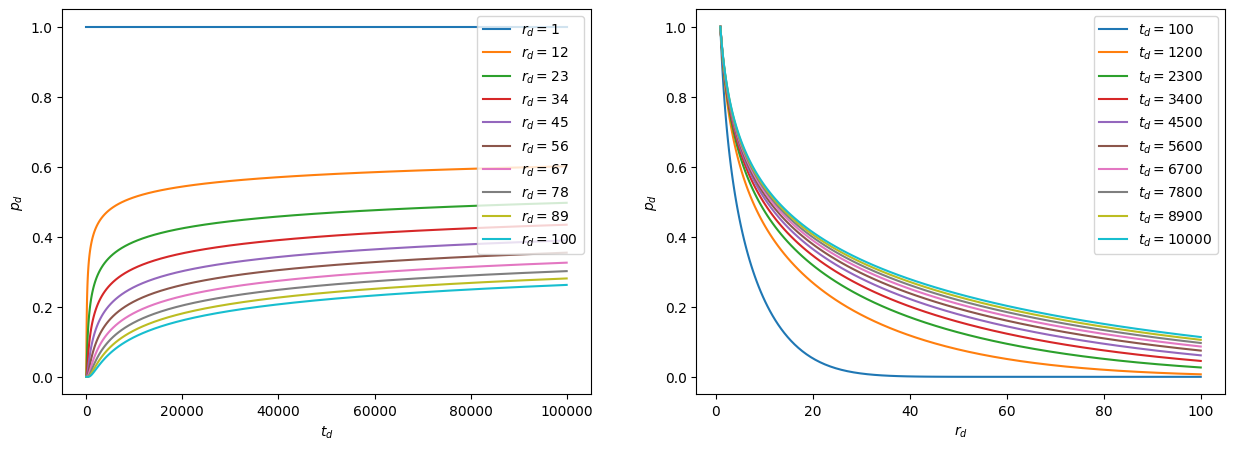

In [77]:
"""
Построим графики для проверки решения
"""

# преобразование sympy выражения в lambda функцию 
sol_const_pres_numpy = sp.lambdify([u, r_d], 
                          eq_sol_const_pres.rhs.subs(p_wd, 1), 
                          modules = ['numpy', 'scipy'])

# после преобразования lambda функцию можно 
# использовать для проведения расчетов как обычныую функцию

# определим функцию для расчета обратного преобразования Лапласа
# отдельная функция удобно чтобы передавать r_d второй параметр
def sol_const_pres_inv_lapl_numpy(t_d=1000, r_d=1):
    sol_lap = anaflow.get_lap_inv(sol_const_pres_numpy,  
                                  r_d=r_d)
    return sol_lap(t_d)

# зададим диапазоны изменения параметров для построения графиков
td_arr = np.logspace(1,5,100)
rd_arr = np.logspace(0,2,100)
re=100
# построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
for ri in np.linspace(1,100,10):
    ax1.plot(td_arr, 
             sol_const_pres_inv_lapl_numpy(td_arr, 
                                          r_d=ri), 
             label = f'$r_d={ri:.0f}$')
for ti in np.linspace(1e2, 1e4,10):
    ax2.plot(rd_arr, 
             np.squeeze([sol_const_pres_inv_lapl_numpy(ti, 
                              r_d=ri) for ri in rd_arr]), 
             label = f'$t_d={ti:.0f}$')
# наведем немного красоты
ax1.set_xlabel('$t_d$')
ax1.set_ylabel('$p_d$')
ax1.legend()
ax2.set_xlabel('$r_d$')
ax2.set_ylabel('$p_d$')
ax2.legend()
plt.show()

In [78]:
sol_qd = sp.Eq(Lq_d, -r_d * sp.diff(eq_sol_const_pres.rhs, r_d)).subs({r_d:1})
display(sol_qd)

Eq(\widetilde{q_D}, p_wD*besselk(1, sqrt(u))/(sqrt(u)*besselk(0, sqrt(u))))

In [79]:
qd_finite_rw_inv = sp.lambdify([u, r_d], 
                          sol_qd.rhs.subs(p_wd, 1), 
                          modules = ['numpy', 'scipy'])

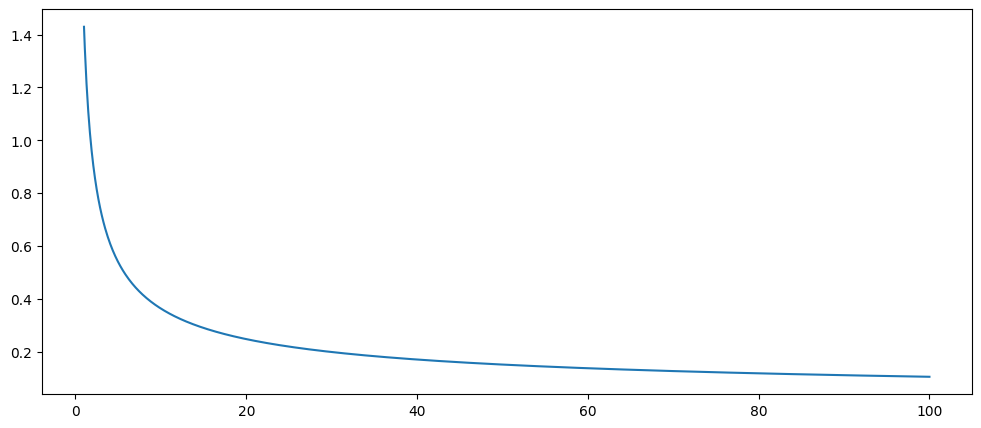

In [80]:
td_arr = np.linspace(1, 100, 1000)

plt.plot(td_arr, qd_finite_rw_inv(td_arr, r_d=1) )
plt.show()